In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

In [2]:
train_df = pd.read_csv('../data/train.csv')

In [3]:
train_df.shape

(891, 12)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
train_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
train_df.columns = train_df.columns.str.lower()

In [10]:
train_df.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [11]:
train_df = train_df.drop(columns=['cabin']).copy()

In [12]:
train_df.loc[train_df.duplicated()]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked


In [13]:
train_df.loc[train_df['age'].isnull()].describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,177.000000,177.000000,177.000000,0.0,177.000000,177.000000,177.000000
mean,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567
std,250.552901,0.456787,0.763216,NaN,1.626316,0.534145,31.874608
min,6.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000
25%,230.000000,0.000000,3.000000,NaN,0.000000,0.000000,7.750000
50%,452.000000,0.000000,3.000000,NaN,0.000000,0.000000,8.050000
75%,634.000000,1.000000,3.000000,NaN,0.000000,0.000000,24.150000
max,889.000000,1.000000,3.000000,NaN,8.000000,2.000000,227.525000


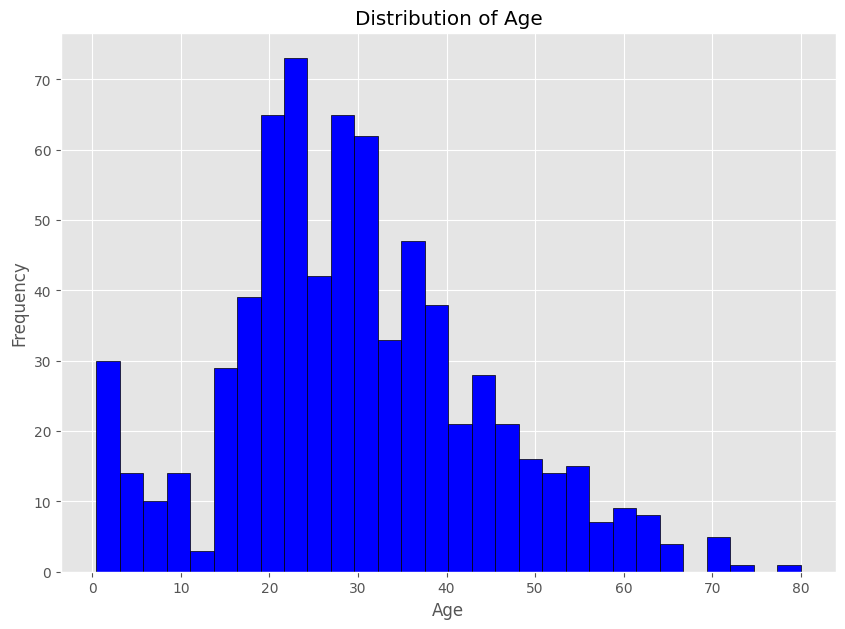

In [14]:
train_df['age'].plot(kind='hist', bins=30, color='blue', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [15]:
train_df['title'] = train_df['name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
train_df.loc[(train_df['age'].isnull())]['title'].groupby(train_df['pclass']).value_counts()

pclass  title 
1       Mr        20
        Mrs        8
        Dr         1
        Miss       1
2       Mr         9
        Miss       2
3       Mr        90
        Miss      33
        Mrs        9
        Master     4
Name: count, dtype: int64

In [16]:
age_median = train_df.groupby(['title', 'pclass'])['age'].median()
age_median

title     pclass
Capt      1         70.0
Col       1         58.0
Countess  1         33.0
Don       1         40.0
Dr        1         46.5
          2         38.5
Jonkheer  1         38.0
Lady      1         48.0
Major     1         48.5
Master    1          4.0
          2          1.0
          3          4.0
Miss      1         30.0
          2         24.0
          3         18.0
Mlle      1         24.0
Mme       1         24.0
Mr        1         40.0
          2         31.0
          3         26.0
Mrs       1         41.5
          2         32.0
          3         31.0
Ms        2         28.0
Rev       2         46.5
Sir       1         49.0
Name: age, dtype: float64

In [17]:
train_df['age'] = train_df['age'].fillna(train_df.groupby(['title', 'pclass', 'sex'])['age'].transform('median'))

In [18]:
train_df.isnull().sum()

passengerid    0
survived       0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
embarked       2
title          0
dtype: int64

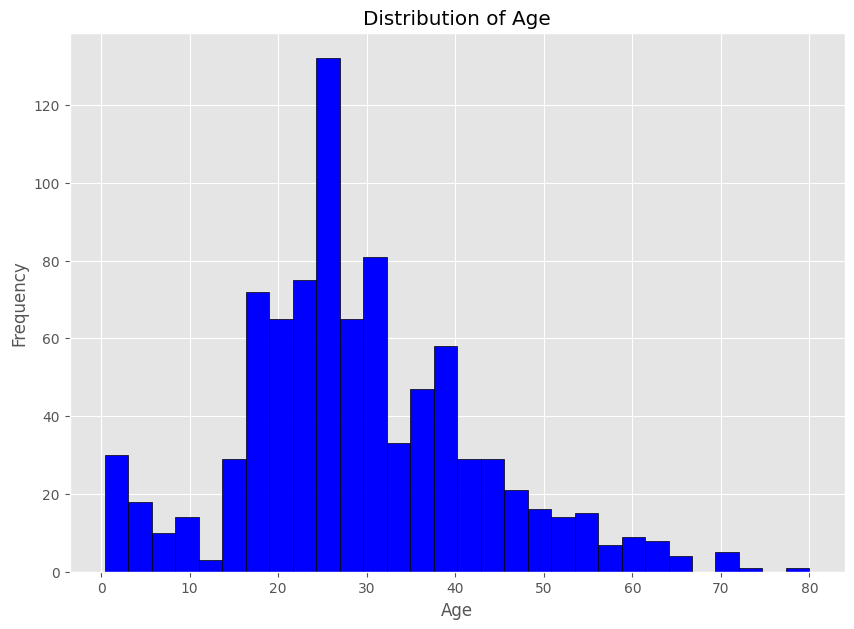

In [19]:
train_df['age'].plot(kind='hist', bins=30, color='blue', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [21]:
train_df.loc[train_df['embarked'].isnull()]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,title
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,Mrs


In [37]:
train_df.loc[train_df['pclass'] == 1].value_counts('embarked')

embarked
S    127
C     85
Q      2
Name: count, dtype: int64

In [38]:
train_df['embarked'] = train_df['embarked'].fillna('S')

In [39]:
train_df.isnull().sum()

passengerid    0
survived       0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
embarked       0
title          0
dtype: int64

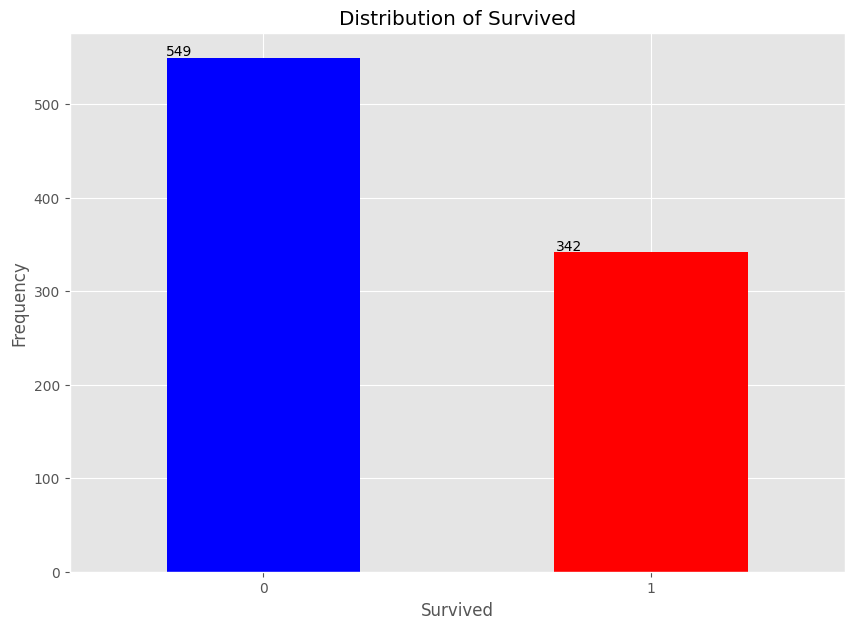

In [46]:
ax = train_df['survived'].value_counts().plot(kind='bar', color=['blue', 'red'], figsize=(10,7))
plt.title('Distribution of Survived')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

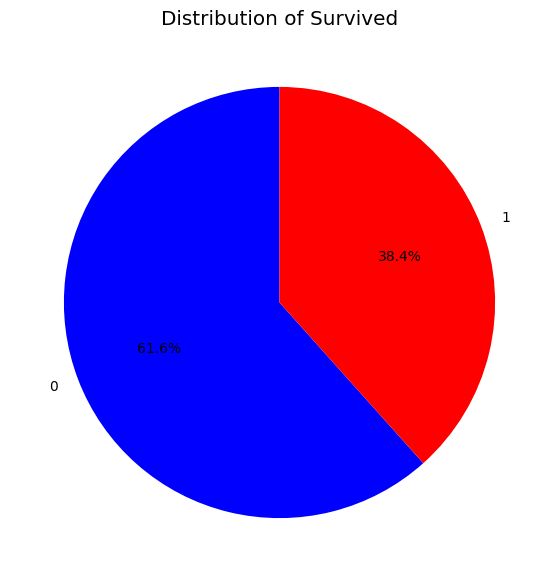

In [49]:
ax = train_df['survived'].value_counts().plot(kind='pie', colors=['blue', 'red'], figsize=(10,7), autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Survived')
plt.ylabel('')  

plt.show()

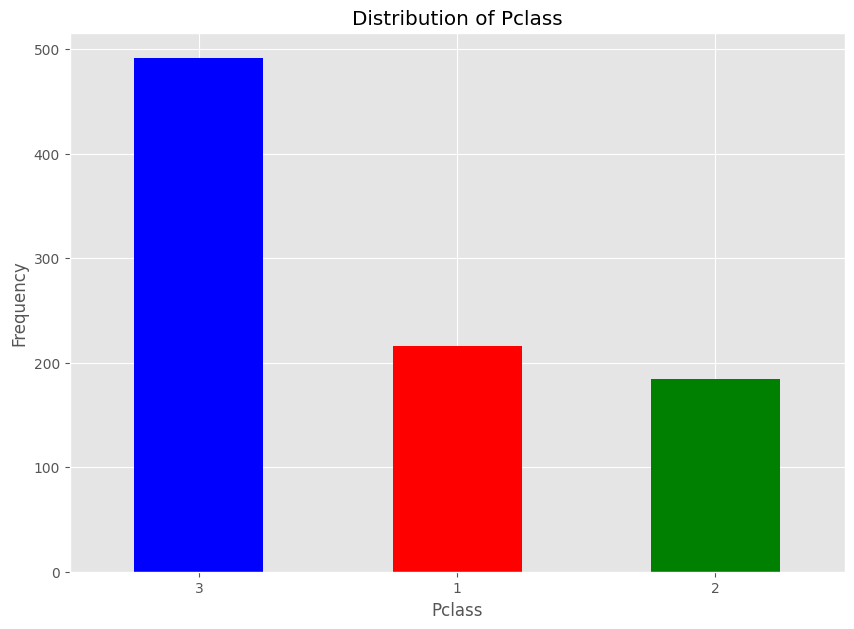

In [50]:
train_df['pclass'].value_counts().plot(kind='bar', color=['blue', 'red', 'green'], figsize=(10,7))
plt.title('Distribution of Pclass')
plt.xlabel('Pclass')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

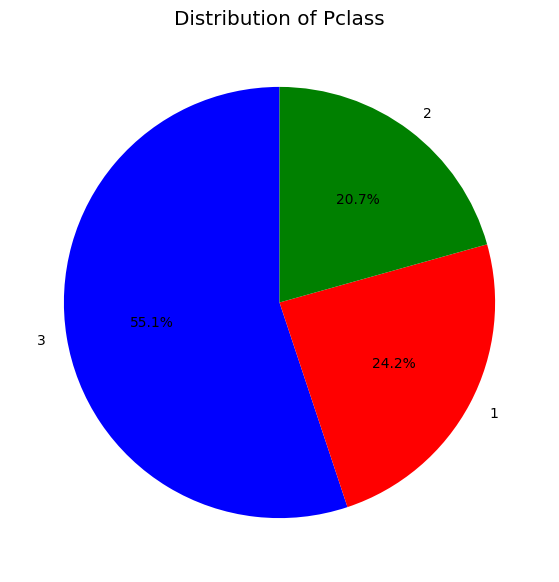

In [51]:
train_df['pclass'].value_counts().plot(kind='pie', colors=['blue', 'red', 'green'], figsize=(10,7), autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Pclass')
plt.ylabel('')  
plt.show()


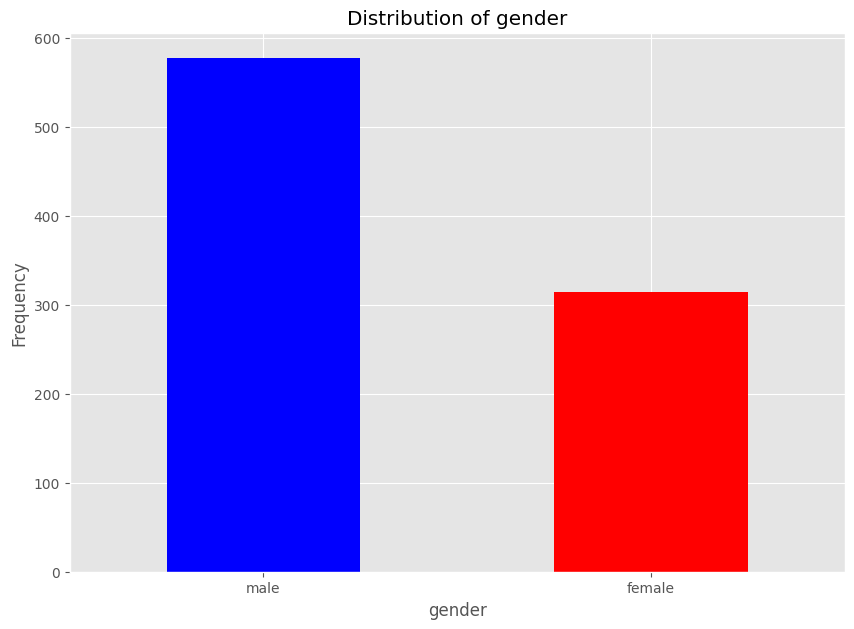

In [52]:
train_df['sex'].value_counts().plot(kind='bar', color=['blue', 'red'], figsize=(10,7))
plt.title('Distribution of gender')
plt.xlabel('gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

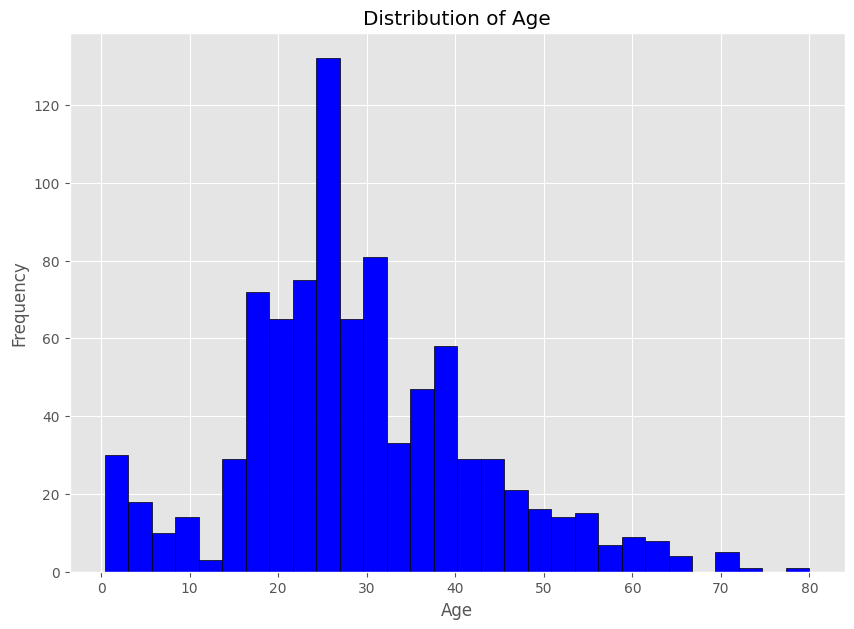

In [53]:
train_df['age'].plot(kind='hist', bins=30, color='blue', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

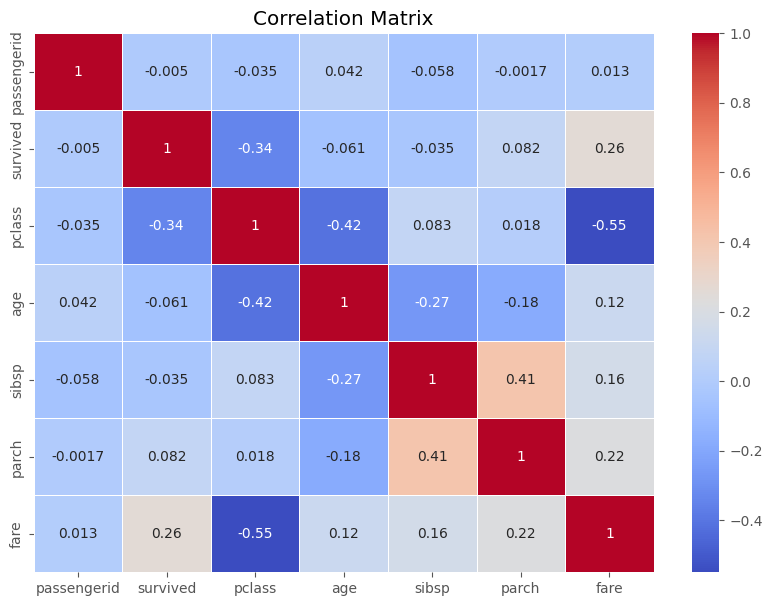

In [54]:
corr_matrix = train_df.corr(numeric_only=True)
plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [57]:
train_df['sex'] = train_df['sex'].replace({'male': 0, 'female': 1}).astype(int)

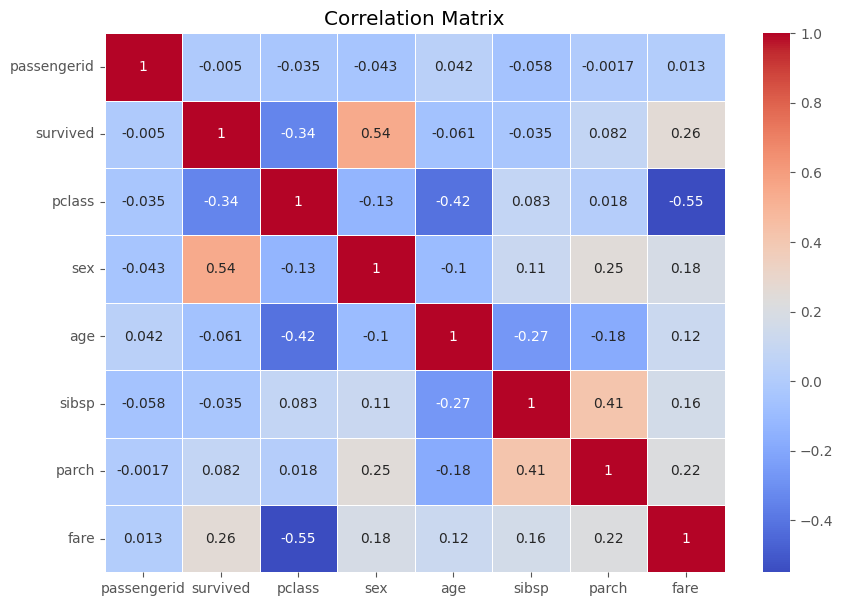

In [59]:
corr_matrix = train_df.corr(numeric_only=True)
plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

C:\Users\juanm\AppData\Local\Temp\ipykernel_17752\1719242064.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pclass', y='age', data=train_df, palette='coolwarm')


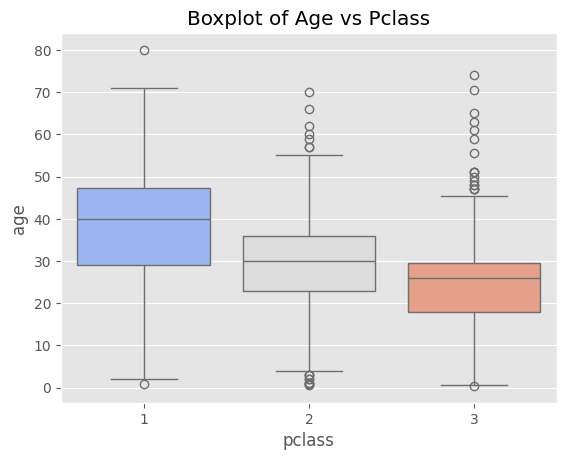

In [63]:
sns.boxplot(x='pclass', y='age', data=train_df, palette='coolwarm')
plt.title('Boxplot of Age vs Pclass')
plt.show()


C:\Users\juanm\AppData\Local\Temp\ipykernel_17752\3546480784.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=train_df, x='pclass', y='survived', hue='sex', ci=None)


Text(0.5, 1.0, 'Tasa de Supervivencia por Clase y Género')

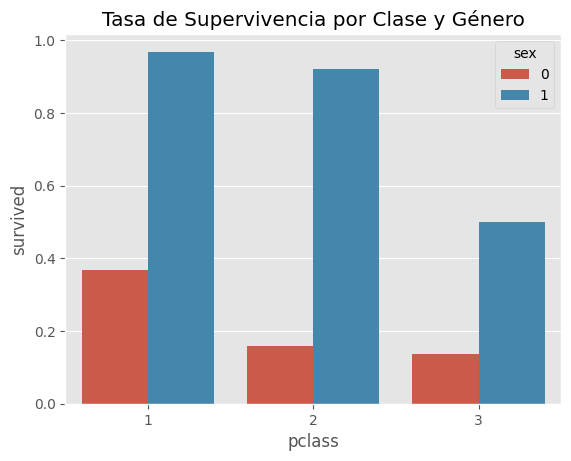

In [66]:
# Supervivencia por género y clase
sns.barplot(data=train_df, x='pclass', y='survived', hue='sex', ci=None)
plt.title("Tasa de Supervivencia por Clase y Género")